# -Exercici1

Resumeix estadísticament les columnes d’interès 

Troba quantes dades faltants hi ha per columna


Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)/


Taula de les aerolínies amb més endarreriments acumulats/
Quins són els vols més llargs? I els més endarrerits?/
Etc./

Format
An .xdf file with 1936758 observations on the following 29 variables:

Year
year of the flight (stored as factor).

Month
month of the flight (stored as factor).

DayOfMonth
day of the month (1 to 31) (stored as integer).

DayOfWeek
day of the week (stored as factor).

DepTime
actual departure time (stored as float).

CRSDepTime
scheduled departure time (stored as float).

ArrTime
actual arrival time (stored as float).

CRSArrTime
scheduled arrival time (stored as float).

UniqueCarrier
carrier ID (stored as factor).

FlightNum
flight number (stored as factor).

TailNum
plane's tail number (stored as factor).

ActualElapsedTime
actual elapsed time of the flight, in minutes (stored as integer).

CRSElapsedTime
scheduled elapsed time of the flight, in minutes (stored as integer).

AirTime
airborne time for the flight, in minutes (stored as integer).

ArrDelay
arrival delay, in minutes (stored as integer).

DepDelay
departure delay, in minutes (stored as integer).

Origin
originating airport (stored as factor).

Dest
destination airport (stored as factor).

Distance
flight distance (stored as integer).

TaxiIn
taxi time from wheels down to arrival at the gate, in minutes (stored as integer).

TaxiOut
taxi time from departure from the gate to wheels up, in minutes (stored as integer).

Cancelled
cancellation status (stored as logical).

CancellationCode
cancellation code, if applicable (stored as factor).

Diverted
diversion status (stored as logical).

CarrierDelay
delay, in minutes, attributable to the carrier (stored integer).

WeatherDelay
delay, in minutes, attributable to weather factors (stored as integer).

NASDelay
delay, in minutes, attributable to the National Aviation System (stored as integer).

SecurityDelay
delay, in minutes, attributable to security factors (stored as integer).

LateAircraftDelay
delay, in minutes, attributable to late-arriving aircraft (stored as integer).

Details
This data set contains on-time performance data from 2008. It is an .xdf file, which means that the data are stored in blocks. The AirlineData87to08.xdf data file contains 832 blocks.

Source
American Statistical Association Statistical Computing Group, Data Expo '09. http://stat-computing.org/dataexpo/2008/the-data.html

## Libreries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import datetime as dt
from datetime import time
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

## reding the data 

In [2]:
# set to see all the columns

pd.set_option('display.max_columns', None)

In [3]:
# read the CSV file for the delayed flights, 

data = pd.read_csv('DelayedFlights.csv',sep=",",
                encoding = 'utf-8',
                index_col = 0,
                low_memory = False,
                #nrows=500000 
                  )

In [4]:
data.shape

(1936758, 29)

In [5]:
# get the data set of airlines names and codes from : Bureau of Transportation Statistics(USA)

df_carriers = pd.read_csv('airlines_names_code.csv',sep=",",
                encoding = 'utf-8',
                index_col = 2,
                low_memory = False,
                )

In [6]:
# merge the both data frames to get just one with the name of the carriers

data = pd.merge(data,df_carriers,left_on='UniqueCarrier',right_on='CARRIER')
data = data.drop(['CARRIER'],axis=1)

In [7]:
data.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
1,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
2,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9005642 entries, 0 to 9005641
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Year                 int64  
 1   Month                int64  
 2   DayofMonth           int64  
 3   DayOfWeek            int64  
 4   DepTime              float64
 5   CRSDepTime           int64  
 6   ArrTime              float64
 7   CRSArrTime           int64  
 8   UniqueCarrier        object 
 9   FlightNum            int64  
 10  TailNum              object 
 11  ActualElapsedTime    float64
 12  CRSElapsedTime       float64
 13  AirTime              float64
 14  ArrDelay             float64
 15  DepDelay             float64
 16  Origin               object 
 17  Dest                 object 
 18  Distance             int64  
 19  TaxiIn               float64
 20  TaxiOut              float64
 21  Cancelled            int64  
 22  CancellationCode     object 
 23  Diverted             int64  
 24

# Exercici 2

## Studing and cleaning the Data

### Data profiling report

In [9]:
data.sample(4)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME
6204895,2008,3,9,7,2041.0,2000,2158.0,2115,MQ,3749,N902BC,77.0,75.0,56.0,43.0,41.0,DFW,JAN,408,4.0,17.0,0,N,0,0.0,0.0,2.0,0.0,41.0,Envoy Air
7470477,2008,12,24,3,1928.0,1809,2121.0,1954,9E,2918,85439E,113.0,105.0,73.0,87.0,79.0,TYS,DTW,443,8.0,32.0,0,N,0,79.0,0.0,8.0,0.0,0.0,Endeavor Air Inc.
7726986,2008,4,26,6,1846.0,1810,1944.0,1915,AA,831,N425AA,178.0,185.0,163.0,29.0,36.0,DFW,SAN,1171,1.0,14.0,0,N,0,14.0,0.0,0.0,0.0,15.0,American Airlines Inc.
992905,2008,6,21,6,1244.0,1155,1418.0,1337,XE,2454,N34111,94.0,102.0,75.0,41.0,49.0,MEM,IAH,469,6.0,13.0,0,N,0,4.0,0.0,0.0,0.0,37.0,ExpressJet Airlines Inc.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9005642 entries, 0 to 9005641
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Year                 int64  
 1   Month                int64  
 2   DayofMonth           int64  
 3   DayOfWeek            int64  
 4   DepTime              float64
 5   CRSDepTime           int64  
 6   ArrTime              float64
 7   CRSArrTime           int64  
 8   UniqueCarrier        object 
 9   FlightNum            int64  
 10  TailNum              object 
 11  ActualElapsedTime    float64
 12  CRSElapsedTime       float64
 13  AirTime              float64
 14  ArrDelay             float64
 15  DepDelay             float64
 16  Origin               object 
 17  Dest                 object 
 18  Distance             int64  
 19  TaxiIn               float64
 20  TaxiOut              float64
 21  Cancelled            int64  
 22  CancellationCode     object 
 23  Diverted             int64  
 24

In [11]:
print(data.shape)

(9005642, 30)


In [12]:
# Importing the pandas Profile Report
#https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3

from pandas_profiling import ProfileReport


In [13]:
#generate a profile report
profile = ProfileReport(data, minimal=True)

In [14]:
#in to widgets and read the report
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

error uploading: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f9329a97130>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))


In [14]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#profile.to_file("flight delays inicial data frame report.html")

In [15]:
# get the number of unique values for each column

data.nunique()

Year                      1
Month                    12
DayofMonth               31
DayOfWeek                 7
DepTime                1438
CRSDepTime             1207
ArrTime                1440
CRSArrTime             1364
UniqueCarrier            20
FlightNum              7499
TailNum                5366
ActualElapsedTime       673
CRSElapsedTime          515
AirTime                 650
ArrDelay               1128
DepDelay               1058
Origin                  303
Dest                    304
Distance               1419
TaxiIn                  180
TaxiOut                 332
Cancelled                 2
CancellationCode          4
Diverted                  2
CarrierDelay            983
WeatherDelay            599
NASDelay                574
SecurityDelay           156
LateAircraftDelay       564
UNIQUE_CARRIER_NAME      22
dtype: int64

In [16]:
# get the nulls in each columns

data.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
DepTime                      0
CRSDepTime                   0
ArrTime                  30570
CRSArrTime                   0
UniqueCarrier                0
FlightNum                    0
TailNum                     30
ActualElapsedTime        36575
CRSElapsedTime            1184
AirTime                  36575
ArrDelay                 36575
DepDelay                     0
Origin                       0
Dest                         0
Distance                     0
TaxiIn                   30570
TaxiOut                   2396
Cancelled                    0
CancellationCode             0
Diverted                     0
CarrierDelay           3039617
WeatherDelay           3039617
NASDelay               3039617
SecurityDelay          3039617
LateAircraftDelay      3039617
UNIQUE_CARRIER_NAME          0
dtype: int64

In [18]:
# get all the columns that have more then 25% of the values is NA

data.isna().mean() >= 0.25

Year                   False
Month                  False
DayofMonth             False
DayOfWeek              False
DepTime                False
CRSDepTime             False
ArrTime                False
CRSArrTime             False
UniqueCarrier          False
FlightNum              False
TailNum                False
ActualElapsedTime      False
CRSElapsedTime         False
AirTime                False
ArrDelay               False
DepDelay               False
Origin                 False
Dest                   False
Distance               False
TaxiIn                 False
TaxiOut                False
Cancelled              False
CancellationCode       False
Diverted               False
CarrierDelay            True
WeatherDelay            True
NASDelay                True
SecurityDelay           True
LateAircraftDelay       True
UNIQUE_CARRIER_NAME    False
dtype: bool

<AxesSubplot:>

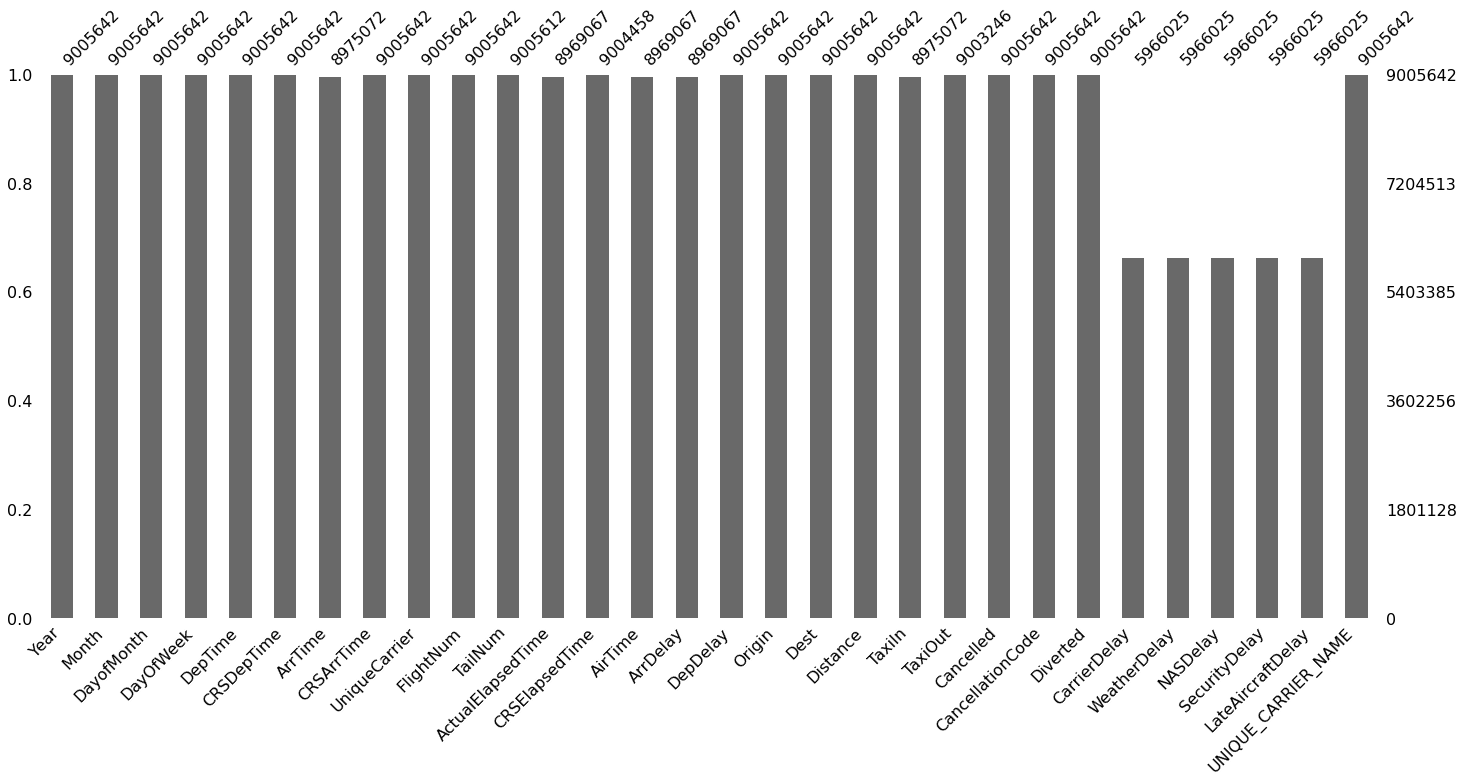

In [15]:
# Using the missingno Python library to Identify and Visualise Missing Data
#https://github.com/ResidentMario/missingno
msno.bar(data)

<AxesSubplot:>

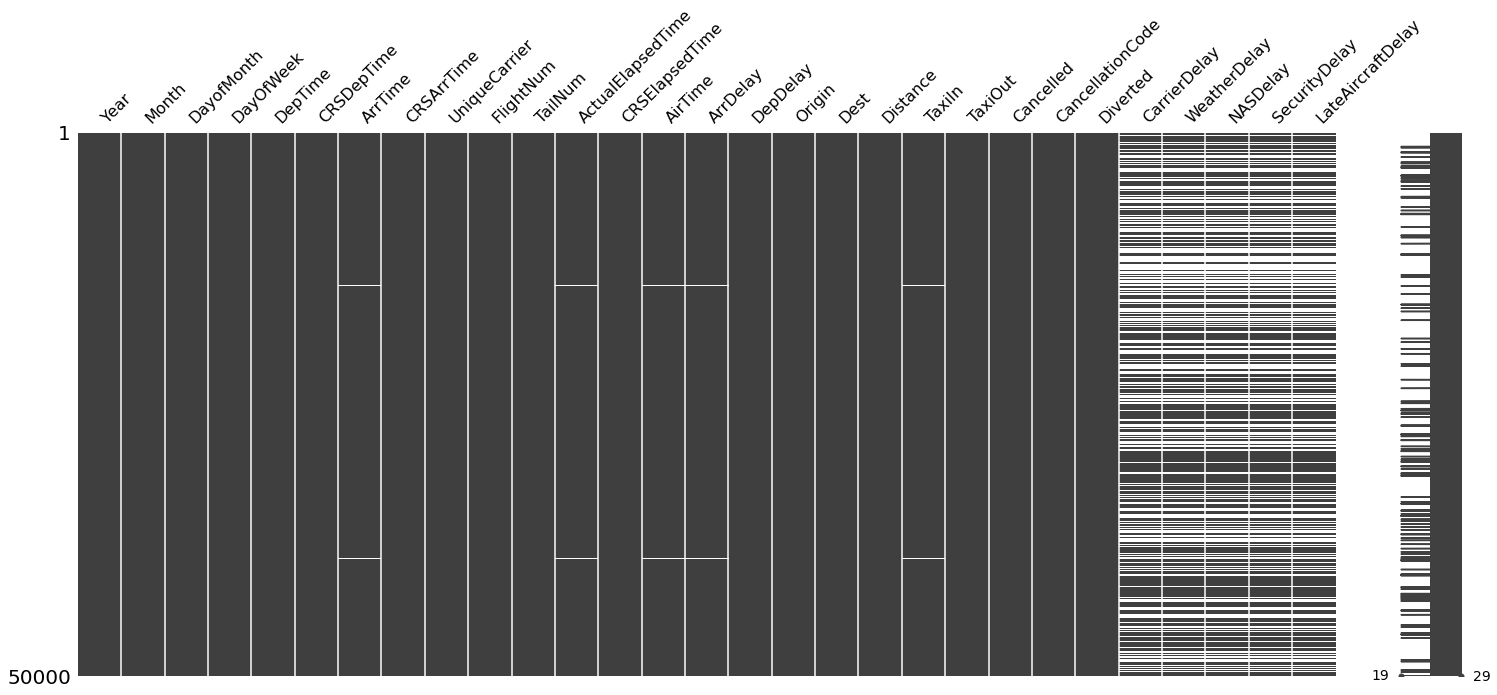

In [12]:
# Using the missingno Python library to Identify and Visualise Missing Data

msno.matrix(data)

### Drop the unnecessary columns

In [11]:
data.drop(['FlightNum', 'TailNum'], axis = 1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
1,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
2,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
3,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
4,2008,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005637,2008,12,1,1,915.0,855,1424.0,1403,CO,189.0,188.0,168.0,21.0,20.0,SNA,IAH,1347,7.0,14.0,0,N,0,0.0,0.0,21.0,0.0,0.0,Continental Air Lines Inc.
9005638,2008,12,1,1,1211.0,1205,1739.0,1747,CO,208.0,222.0,185.0,-8.0,6.0,SMF,IAH,1609,10.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.
9005639,2008,12,1,1,1211.0,1205,1739.0,1747,CO,208.0,222.0,185.0,-8.0,6.0,SMF,IAH,1609,10.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.
9005640,2008,12,1,1,1211.0,1205,1739.0,1747,CO,208.0,222.0,185.0,-8.0,6.0,SMF,IAH,1609,10.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.


### Deling with the messing values

In [12]:
# Fill the NA vallues using the intorpolate function

data['DepDelay'].fillna(data['DepDelay'].interpolate(), inplace=True)
data['ArrDelay'].fillna(data['ArrDelay'].interpolate(), inplace=True)
data['DepTime'].fillna(data['DepTime'].interpolate(), inplace=True)
data['ArrTime'].fillna(data['ArrTime'].interpolate(), inplace=True)
data['AirTime'].fillna(data['AirTime'].interpolate(), inplace=True)

## Data Exploration

### Creating new Columns

In [13]:
# adding a columns with the total delay.

data['TotalDelay'] = data['DepDelay'] + data['ArrDelay']

In [14]:
#calculating the flight speed for each record based on the distance covered and air time and adding as a column

data['FlightSpeed'] =  data['Distance']/data['AirTime']
data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME,TotalDelay,FlightSpeed
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,-6.0,6.982759
1,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,-6.0,6.982759
2,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,21.0,7.168142
3,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,21.0,7.168142
4,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,22.0,6.776316


In [15]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME,TotalDelay,FlightSpeed
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,-6.0,6.982759
1,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,-6.0,6.982759
2,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,21.0,7.168142
3,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,21.0,7.168142
4,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,22.0,6.776316


### expoloring the delays

#### Arrival delays

In [16]:
# create a new data frame to get the arrivale delay

data_arrival_delay  = data.groupby(['Dest']).agg({'ArrDelay':[np.mean,np.size]}).sort_values(by=[('ArrDelay','mean')], ascending=False)
data_arrival_delay.head()

ArrDelay      
            mean  size
Dest                  
CYS   121.000000     3
MQT    77.775463  2592
SPI    74.853452  2303
INL    66.777778    54
ALO    66.272727   330

In [17]:
data_arrival_delay[('ArrDelay','size')].describe()

count       304.000000
mean      29623.822368
std       74048.255223
min           3.000000
25%        1695.250000
50%        6887.000000
75%       26014.250000
max      910537.000000
Name: (ArrDelay, size), dtype: float64

<AxesSubplot:xlabel='Dest'>

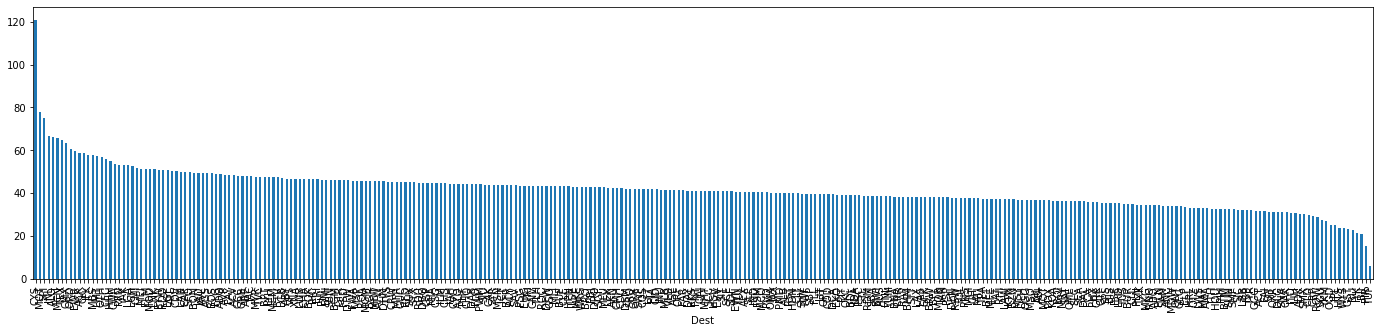

In [18]:
data_arrival_delay[('ArrDelay','mean')].plot(kind='bar',figsize=(24,5))

In [19]:
data_arrival_delay_q1 = data_arrival_delay[data_arrival_delay[('ArrDelay','size')] >29623]
data_arrival_delay_q1

ArrDelay        
           mean    size
Dest                   
ORD   60.466714  511059
EWR   59.793579  236079
JFK   57.943690  176946
LGA   52.938933  191721
ATL   50.242929  910537
...         ...     ...
HOU   32.665626   43882
SMF   32.429812   47494
SJC   32.266989   49138
SNA   31.090724   43263
OAK   31.012003   44612

[68 rows x 2 columns]

<AxesSubplot:xlabel='Dest'>

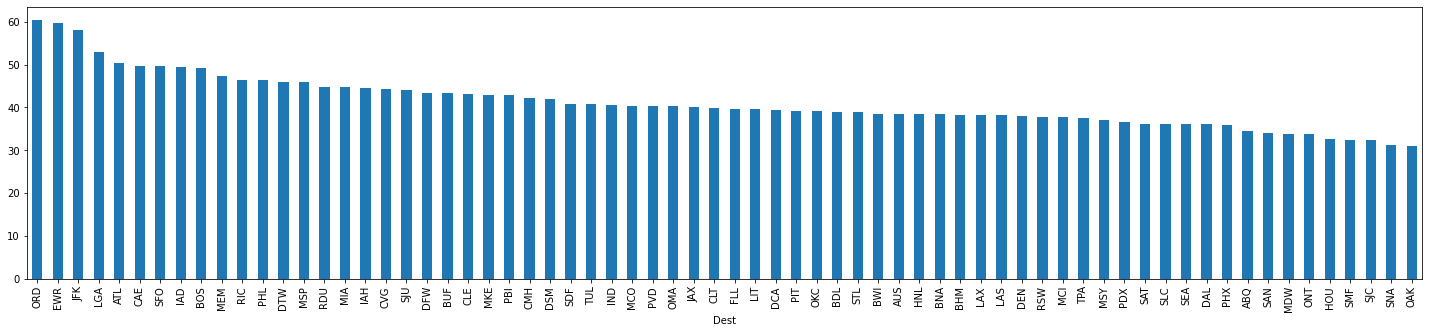

In [20]:
data_arrival_delay_q1[('ArrDelay','mean')].plot(kind='bar',figsize=(25,5))

In [21]:
#Destinations which registered with higest and lowest arrival_delay
print("Destination with highest arrival_delay :" + str(data_arrival_delay.index[0]) 
      + " with average delay of " + str(round(data_arrival_delay[('ArrDelay','mean')].iloc[0],2)))
print("Destination with Lowest arrival_delay : " + str(data_arrival_delay.index[-1]) 
      + " with average delay of " + str(round(data_arrival_delay[('ArrDelay','mean')].iloc[-1],2)))

Destination with highest arrival_delay :CYS with average delay of 121.0
Destination with Lowest arrival_delay : TUP with average delay of 6.0


#### Departure delay

In [22]:
data_departure_delay  = data.groupby(['Dest']).agg({'DepDelay':[np.mean,np.size]}).sort_values(by=[('DepDelay','mean')], ascending=False)
data_departure_delay.head()

DepDelay      
           mean  size
Dest                 
MQT   77.384259  2592
SPI   72.146765  2303
MCN   67.569061  2896
INL   67.444444    54
TEX   66.312500   224

In [23]:
#Destinations which registered with higest and lowest departure_delay
print("Destination with highest departure_delay :" + str(data_departure_delay.index[0]) 
      + " with average delay of " + str(round(data_departure_delay[('DepDelay','mean')].iloc[0],2)))
print("Destination with Lowest DepDelay : " + str(data_departure_delay.index[-1]) 
      + " with average delay of " + str(round(data_departure_delay[('DepDelay','mean')].iloc[-1],2)))

Destination with highest departure_delay :MQT with average delay of 77.38
Destination with Lowest DepDelay : OGD with average delay of 8.0


<AxesSubplot:xlabel='Dest'>

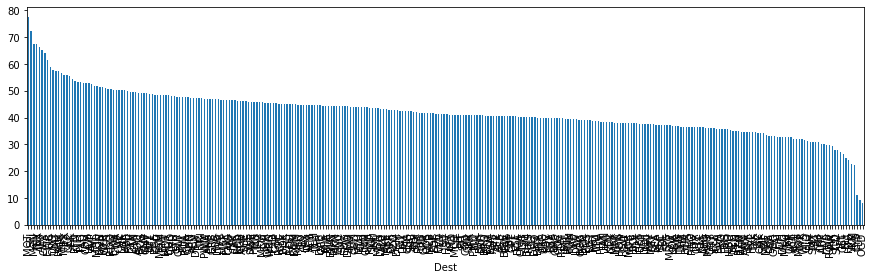

In [24]:
data_departure_delay[('DepDelay','mean')].plot(kind='bar',figsize=(15,4))

#### Airlines delay


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338485 entries, 0 to 2338484
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Year                 int64  
 1   Month                int64  
 2   DayofMonth           int64  
 3   DayOfWeek            int64  
 4   DepTime              float64
 5   CRSDepTime           int64  
 6   ArrTime              float64
 7   CRSArrTime           int64  
 8   UniqueCarrier        object 
 9   FlightNum            int64  
 10  TailNum              object 
 11  ActualElapsedTime    float64
 12  CRSElapsedTime       float64
 13  AirTime              float64
 14  ArrDelay             float64
 15  DepDelay             float64
 16  Origin               object 
 17  Dest                 object 
 18  Distance             int64  
 19  TaxiIn               float64
 20  TaxiOut              float64
 21  Cancelled            int64  
 22  CancellationCode     object 
 23  Diverted             int64  
 24

In [25]:
airlines_delay_summury = data.groupby(['UNIQUE_CARRIER_NAME']).agg({'DepDelay': [np.mean],
                                                                   'ArrDelay': [np.mean,np.size]})
airlines_delay_summury

DepDelay   ArrDelay         
                                         mean       mean     size
UNIQUE_CARRIER_NAME                                              
AirTran Airways Corporation         42.535239  43.780195   356420
Alaska Airlines Inc.                38.300435  36.181623    78586
Aloha Airlines Inc.                 26.680000  21.310667     1500
American Airlines Inc.              46.481953  46.578237   767460
Comair Inc.                         48.937311  51.060214   210628
Continental Air Lines Inc.          43.138680  40.607800   400780
Delta Air Lines Inc.                39.059306  39.996984   456952
Endeavor Air Inc.                   47.370338  46.968478   311310
Envoy Air                           43.726198  45.327822   851520
ExpressJet Airlines Inc.            50.098444  50.228056   414652
ExpressJet Airlines LLC d/b/a aha!  48.308463  47.560316  1310032
Frontier Airlines Inc.              27.701227  28.032615   169614
Frontier Airlines Inc. (1)          42.535239  43.804610    71284
Hawaiian Airlines Inc.              33.124433  34.311482    29960
JetBlue Airways                     55.030570  55.207150   276575
Mesa Airlines Inc.                  55.430655  55.341463   469441
Northwest Airlines Inc.             41.306088  43.922290   316432
PSA Airlines Inc.                   48.937311  51.060146   105314
SkyWest Airlines Inc.               44.790943  45.458768   397299
Southwest Airlines Co.              34.718587  30.177827   755204
US Airways Inc.                     38.806187  36.489505   688975
United Air Lines Inc.               49.985710  47.793666   565704

In [26]:
airlines_delay_summury["total_mean_delay"] = airlines_delay_summury[('DepDelay','mean')]+ airlines_delay_summury[('ArrDelay','mean')]
airlines_delay_summury=airlines_delay_summury.sort_values(by='total_mean_delay', ascending=False)
airlines_delay_summury

DepDelay   ArrDelay           \
                                         mean       mean     size   
UNIQUE_CARRIER_NAME                                                 
Mesa Airlines Inc.                  55.430655  55.341463   469441   
JetBlue Airways                     55.030570  55.207150   276575   
ExpressJet Airlines Inc.            50.098444  50.228056   414652   
Comair Inc.                         48.937311  51.060214   210628   
PSA Airlines Inc.                   48.937311  51.060146   105314   
United Air Lines Inc.               49.985710  47.793666   565704   
ExpressJet Airlines LLC d/b/a aha!  48.308463  47.560316  1310032   
Endeavor Air Inc.                   47.370338  46.968478   311310   
American Airlines Inc.              46.481953  46.578237   767460   
SkyWest Airlines Inc.               44.790943  45.458768   397299   
Envoy Air                           43.726198  45.327822   851520   
Frontier Airlines Inc. (1)          42.535239  43.804610    71284   
AirTran Airways Corporation         42.535239  43.780195   356420   
Northwest Airlines Inc.             41.306088  43.922290   316432   
Continental Air Lines Inc.          43.138680  40.607800   400780   
Delta Air Lines Inc.                39.059306  39.996984   456952   
US Airways Inc.                     38.806187  36.489505   688975   
Alaska Airlines Inc.                38.300435  36.181623    78586   
Hawaiian Airlines Inc.              33.124433  34.311482    29960   
Southwest Airlines Co.              34.718587  30.177827   755204   
Frontier Airlines Inc.              27.701227  28.032615   169614   
Aloha Airlines Inc.                 26.680000  21.310667     1500   

                                   total_mean_delay  
                                                     
UNIQUE_CARRIER_NAME                                  
Mesa Airlines Inc.                       110.772117  
JetBlue Airways                          110.237720  
ExpressJet Airlines Inc.                 100.326500  
Comair Inc.                               99.997525  
PSA Airlines Inc.                         99.997457  
United Air Lines Inc.                     97.779376  
ExpressJet Airlines LLC d/b/a aha!        95.868779  
Endeavor Air Inc.                         94.338817  
American Airlines Inc.                    93.060191  
SkyWest Airlines Inc.                     90.249711  
Envoy Air                                 89.054020  
Frontier Airlines Inc. (1)                86.339849  
AirTran Airways Corporation               86.315435  
Northwest Airlines Inc.                   85.228378  
Continental Air Lines Inc.                83.746479  
Delta Air Lines Inc.                      79.056290  
US Airways Inc.                           75.295692  
Alaska Airlines Inc.                      74.482058  
Hawaiian Airlines Inc.                    67.435915  
Southwest Airlines Co.                    64.896415  
Frontier Airlines Inc.                    55.733843  
Aloha Airlines Inc.                       47.990667

In [31]:
# Airlines with maximum mean Departure , arrival and overall delays forte year 2018
#airlines_delay_summurry.set_index(, inplace=True)
print("Airline with Max mean Departure Delay :: " +
      str(airlines_delay_summury[('DepDelay','mean')].idxmax()) +
      " with mean value " + 
      str(airlines_delay_summury[('DepDelay','mean')].max()))
print("Airline with Max mean arrival Delay :: " + 
      str(airlines_delay_summury[('ArrDelay','mean')].idxmax()) + 
      " with mean value " + 
      str(airlines_delay_summury[('ArrDelay','mean')].max()))
print("Airline with Max mean Delay : " +
      str(airlines_delay_summury[('total_mean_delay')].idxmax()) +
      " with mean value " +
      str(airlines_delay_summury[('total_mean_delay')].max()))

Airline with Max mean Departure Delay :: Mesa Airlines Inc. with mean value 55.43065475746686
Airline with Max mean arrival Delay :: Mesa Airlines Inc. with mean value 55.34146250540537
Airline with Max mean Delay : Mesa Airlines Inc. with mean value 110.77211726287223


In [27]:
# Airlines with minimum mean Departure , arrival and overall delays forte year 2018

print("Airline with Min mean Departure Delay :: " +
      str(airlines_delay_summury[('DepDelay','mean')].idxmin()) +
      " with mean value " + 
      str(airlines_delay_summury[('DepDelay','mean')].min()))
print("Airline with Min mean arrival Delay :: " + 
      str(airlines_delay_summury[('ArrDelay','mean')].idxmin()) + 
      " with mean value " + 
      str(airlines_delay_summury[('ArrDelay','mean')].min()))
print("Airline with Min mean Delay : " +
      str(airlines_delay_summury[('total_mean_delay')].idxmin()) +
      " with mean value " +
      str(airlines_delay_summury[('total_mean_delay')].min()))

Airline with Min mean Departure Delay :: Aloha Airlines Inc. with mean value 26.68
Airline with Min mean arrival Delay :: Aloha Airlines Inc. with mean value 21.310666666666666
Airline with Min mean Delay : Aloha Airlines Inc. with mean value 47.99066666666667


### Destinantion flights volum

In [39]:
print("Destination airpot which is most busy :: " + str(data_arrival_delay[('ArrDelay','size')].idxmax()) + 
      "\nTotal no of fligts arrived ::" + str(data_arrival_delay[('ArrDelay','size')].max()))

print("\n\nDestination airpot which is least busy :: " + str(data_arrival_delay[('ArrDelay','size')].idxmin()) + 
      "\nTotal no of fligts arrived ::" + str(data_arrival_delay[('ArrDelay','size')].min()))

Destination airpot which is most busy :: ATL
Total no of fligts arrived ::910537


Destination airpot which is least busy :: CYS
Total no of fligts arrived ::3


<AxesSubplot:xlabel='Dest'>

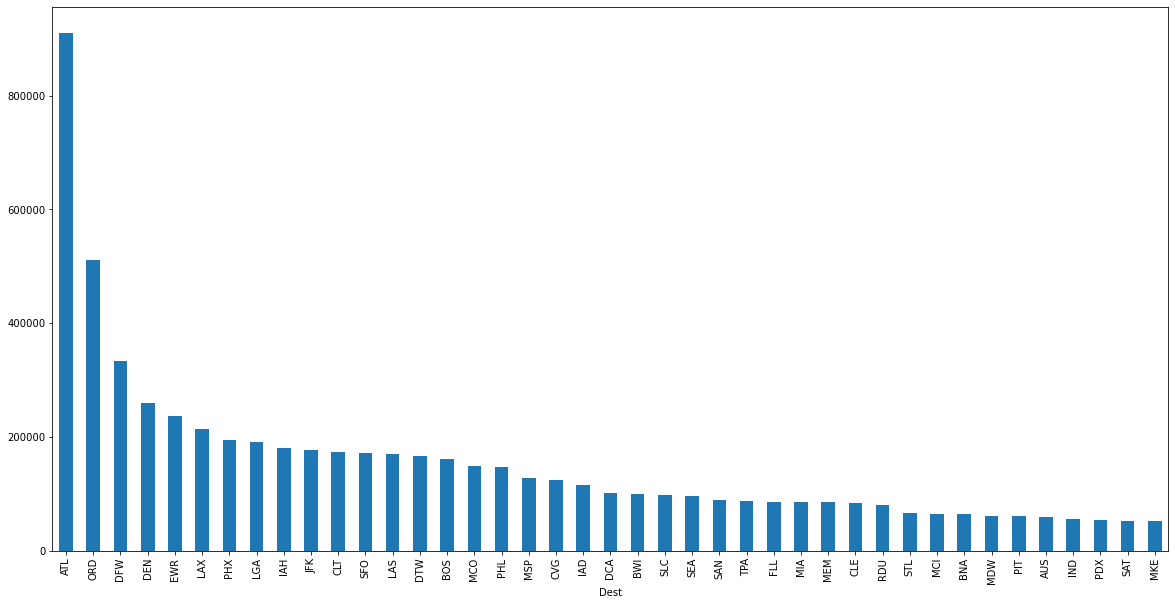

In [44]:
data_arrival_delay_q1[('ArrDelay','size')].sort_values(ascending=False).plot(kind='bar',figsize=(20, 10))

### Monthly Traffic delay

In [28]:
# Make a new dataframe groupping by month to study the monthly patterns

data_delay_monthly = data.groupby(['Month']).agg({'DepDelay':[np.mean],'ArrDelay':[np.mean,np.size]})
data_delay_monthly

DepDelay   ArrDelay        
            mean       mean    size
Month                              
1      43.771219  42.980619  852851
2      46.244946  46.601091  885321
3      44.952688  44.215159  932816
4      42.097233  41.565097  723632
5      39.953766  38.894516  678783
6      46.816880  47.886920  915532
7      49.687257  49.713865  875987
8      45.914461  43.926828  766880
9      39.899335  37.473266  447891
10     37.124031  34.590978  478508
11     41.821617  40.829004  509835
12     49.319824  50.636351  937606

In [19]:
data_delay_monthly['TotalDelay'] = data_delay_monthly[('DepDelay', 'mean')] + data_delay_monthly[('ArrDelay','mean')]
data_delay_monthly

DepDelay   ArrDelay         TotalDelay
            mean       mean    size           
Month                                         
1      43.771219  42.980619  852851  86.751838
2      46.244946  46.601091  885321  92.846037
3      44.952688  44.215159  932816  89.167848
4      42.097233  41.565097  723632  83.662330
5      39.953766  38.894516  678783  78.848281
6      46.816880  47.886920  915532  94.703801
7      49.687257  49.713865  875987  99.401122
8      45.914461  43.926828  766880  89.841289
9      39.899335  37.473266  447891  77.372601
10     37.124031  34.590978  478508  71.715009
11     41.821617  40.829004  509835  82.650620
12     49.319824  50.636351  937606  99.956175

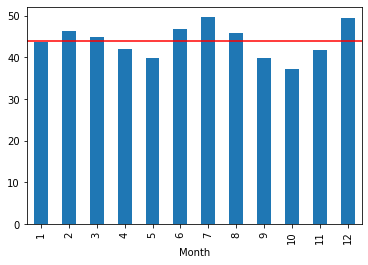

In [29]:
data_delay_monthly[('DepDelay','mean')].plot(kind= 'bar')
plt.axhline(y=data_delay_monthly[('DepDelay','mean')].mean(),color = 'r')

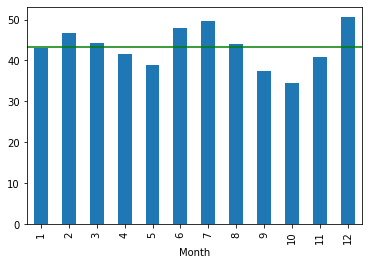

In [30]:
data_delay_monthly[('ArrDelay','mean')].plot(kind= 'bar')
plt.axhline(y=data_delay_monthly[('ArrDelay','mean')].mean(),color = 'g')

<AxesSubplot:xlabel='Month'>

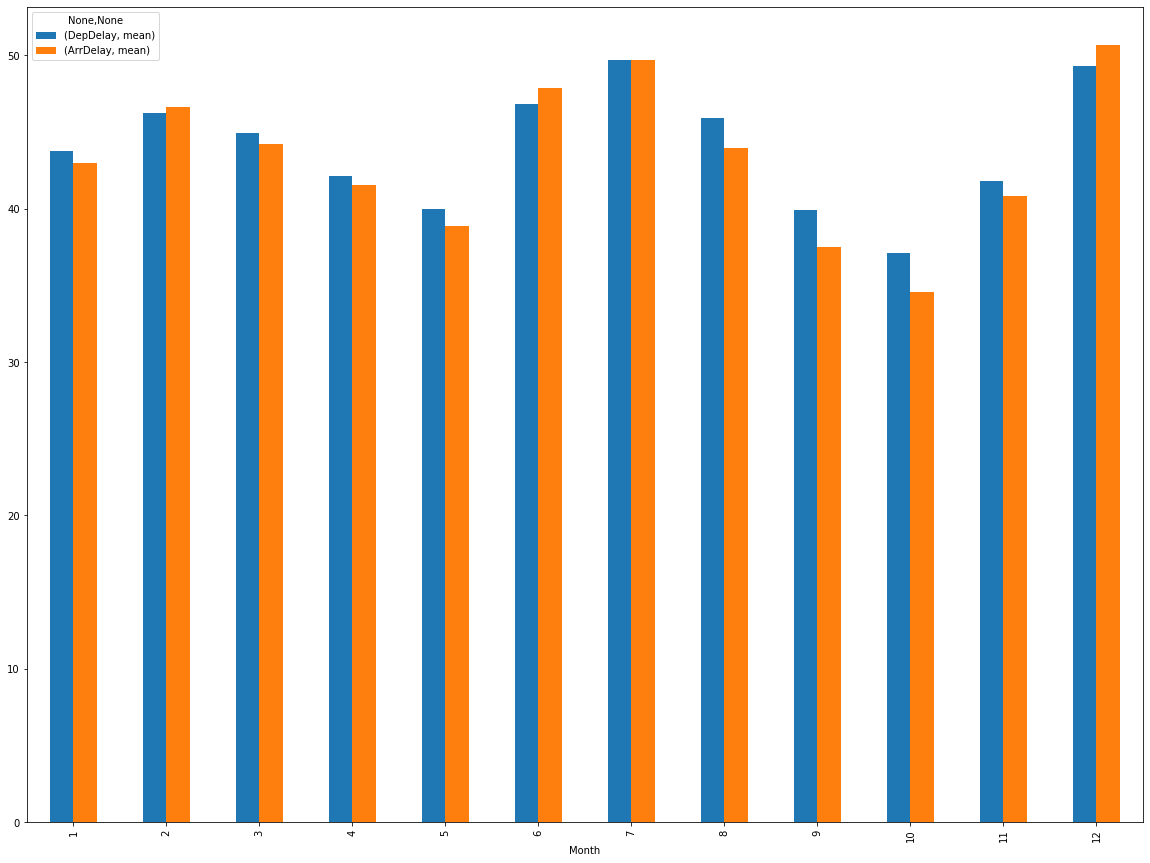

In [31]:
data_delay_monthly.reset_index(inplace=True)
data_delay_monthly.drop(columns=[('ArrDelay','size')], inplace=True)
data_delay_monthly.plot(kind = 'bar',x = 'Month',figsize=(20,15))

### Carrier delay and reasons

In [32]:
# Create a new column

data['total_delay'] = (data['CarrierDelay'] + data['WeatherDelay']
             + data['NASDelay'] + data['SecurityDelay'] + data['LateAircraftDelay'])

In [33]:
# make a new data frame the represent just the delayed flights

data_delayed = data[~np.isnan(data['total_delay'])]
# fill NA Values
data['total_delay'].fillna(0, inplace=True)

data_delayed.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME,TotalDelay,FlightSpeed,total_delay
6,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,Southwest Airlines Co.,68.0,6.688312,34.0
7,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,Southwest Airlines Co.,68.0,6.688312,34.0
10,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,Southwest Airlines Co.,124.0,6.917391,57.0
11,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,Southwest Airlines Co.,124.0,6.917391,57.0
14,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,Southwest Airlines Co.,174.0,7.738318,80.0


In [34]:
# let's  check each column for the delay reasons using the datadelayed frame

carrier_name_group = data_delayed['CarrierDelay'].groupby(data_delayed['UNIQUE_CARRIER_NAME']).mean()
weather_group = data_delayed['WeatherDelay'].groupby(data_delayed['UNIQUE_CARRIER_NAME']).mean()
nas_group = data_delayed['NASDelay'].groupby(data_delayed['UNIQUE_CARRIER_NAME']).mean()
security_group = data_delayed['SecurityDelay'].groupby(data_delayed['UNIQUE_CARRIER_NAME']).mean()
late_group = data_delayed['LateAircraftDelay'].groupby(data_delayed['UNIQUE_CARRIER_NAME']).mean()

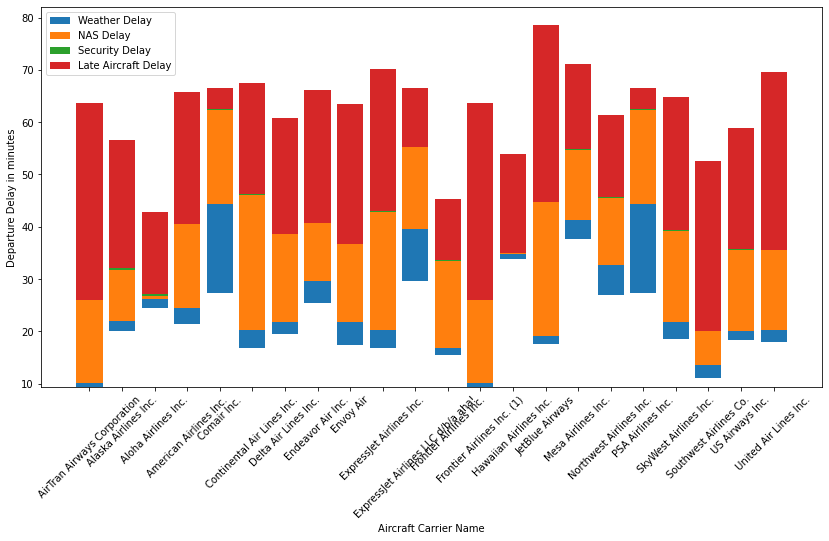

In [36]:
# let's visualize in a subplots all the delay reasons

# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html

w_bottom = carrier_name_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_name_group.index.values

fig, ax = plt.subplots(figsize = (14,7))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)


ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Name')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()


## Summury Table

### Making a summury table

In [37]:
# Creat columns for the summury tablle using the count() And sum(), and mean()

carrier_flights = data['UniqueCarrier'].groupby(data['UNIQUE_CARRIER_NAME']).count()
carrier_cancelled = data['Cancelled'].groupby(data['UNIQUE_CARRIER_NAME']).sum()
carrier_delayed = data_delayed['UniqueCarrier'].groupby(data_delayed['UNIQUE_CARRIER_NAME']).count()
carrier_diverted = data['Diverted'].groupby(data['UNIQUE_CARRIER_NAME']).sum()
carrier_avg_time = data['AirTime'].groupby(data['UNIQUE_CARRIER_NAME']).mean()
carrier_avg_dist = data['Distance'].groupby(data['UNIQUE_CARRIER_NAME']).mean()
carrier_avg_delay = data['total_delay'].groupby(data['UNIQUE_CARRIER_NAME']).mean()
carrier_avg_taxiIn = data['TaxiIn'].groupby(data['UNIQUE_CARRIER_NAME']).mean()
carrier_avg_taxiOut = data['TaxiOut'].groupby(data['UNIQUE_CARRIER_NAME']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)

In [38]:
# concatinating tha columns

summary_table_carrier = pd.concat([carrier_flights,
                                   carrier_cancelled,
                                   carrier_pct_cancelled,
                                   carrier_diverted,
                                   carrier_avg_time,
                                   carrier_avg_dist,
                                   carrier_avg_delay,
                                   carrier_avg_taxiIn,
                                   carrier_avg_taxiOut], axis=1)

In [39]:
# and create columns 

summary_table_carrier.columns = ['Total Flights',
                                 'Cancelled Flights',
                                 'Percent Cancelled',
                                 'Diverted Flights',
                                 'Average Flight Time (minutes)',                               
                                 'Average Flight Distance (miles)',
                                 'Average Flight Delay (minutes)', 
                                 'Average Taxi-In (minutes)',
                                 'Average Taxi-Out (minutes)']

In [40]:
summary_table_carrier

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
UNIQUE_CARRIER_NAME,,,,,,,,,
AirTran Airways Corporation,356420,35,0.009820,1540,104.596819,732.091718,41.922942,7.904302,17.097015
Alaska Airlines Inc.,78586,22,0.027995,544,129.557326,944.703433,34.624411,5.807209,15.826885
Aloha Airlines Inc.,1500,0,0.000000,12,115.493333,889.870667,19.420000,4.177419,8.373333
American Airlines Inc.,767460,184,0.023975,3636,144.458776,1081.993985,45.328142,7.914452,18.905453
Comair Inc.,210628,48,0.022789,768,82.971497,513.280343,49.699356,7.872025,24.558949
...,...,...,...,...,...,...,...,...,...
PSA Airlines Inc.,105314,24,0.022789,384,82.968414,513.280343,49.699356,7.872025,24.558949
SkyWest Airlines Inc.,397299,267,0.067204,1692,71.196809,440.532986,43.522528,6.105919,17.254630
Southwest Airlines Co.,755204,30,0.003972,2772,93.603266,650.811381,28.380867,4.887856,11.243332


### Correlation 

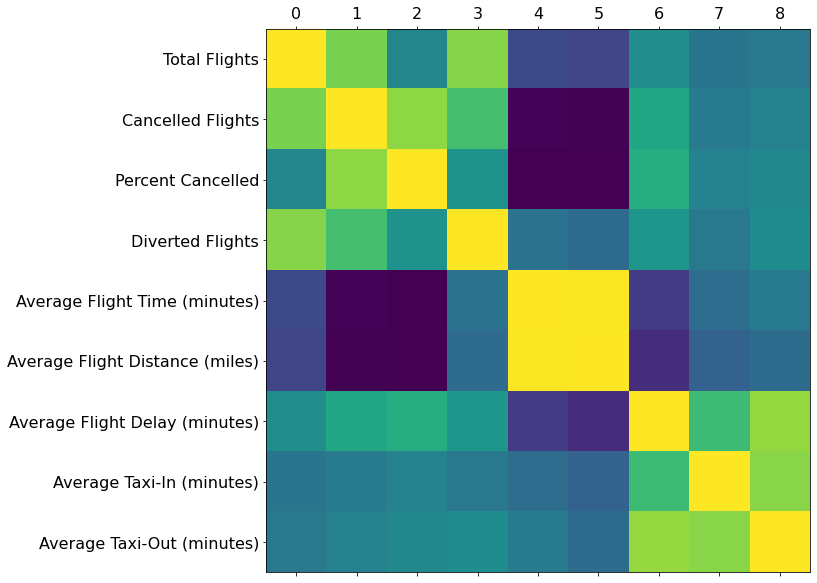

In [66]:
#plt.matshow(summary_table_carrier.corr())
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(summary_table_carrier)

plt.show()

### Fastest & slowest airlines

In [41]:
pd.set_option('display.max_rows', None)

In [42]:
travel_duration = data.groupby('UNIQUE_CARRIER_NAME').agg({'AirTime':[np.mean,np.size]}).sort_values(by=[('AirTime','mean')], ascending=False)

travel_duration

AirTime         
                                          mean     size
UNIQUE_CARRIER_NAME                                    
Continental Air Lines Inc.          165.545596   400780
JetBlue Airways                     150.383983   276575
American Airlines Inc.              144.458776   767460
United Air Lines Inc.               144.061057   565704
US Airways Inc.                     132.255545   688975
Delta Air Lines Inc.                132.128097   456952
Alaska Airlines Inc.                129.557326    78586
Frontier Airlines Inc.              122.252803   169614
Northwest Airlines Inc.             115.867156   316432
Aloha Airlines Inc.                 115.493333     1500
Hawaiian Airlines Inc.              113.623431    29960
AirTran Airways Corporation         104.596819   356420
Frontier Airlines Inc. (1)          104.593903    71284
Southwest Airlines Co.               93.603266   755204
ExpressJet Airlines Inc.             90.894456   414652
Comair Inc.                          82.971497   210628
PSA Airlines Inc.                    82.968414   105314
Endeavor Air Inc.                    73.031666   311310
ExpressJet Airlines LLC d/b/a aha!   72.288787  1310032
SkyWest Airlines Inc.                71.196809   397299
Envoy Air                            69.871213   851520
Mesa Airlines Inc.                   65.706567   469441

In [ ]:
carrier_speeds = data.groupby('UNIQUE_CARRIER_NAME').agg({'FlightSpeed': [np.mean,np.size]})
carrier_speeds

In [ ]:
# gettin the largest and shortest distance using the nlargest() and nsamllest() methods

data.nlargest(2, 'Distance', keep='first')

In [ ]:
# https://medium.com/@tderick/become-a-pandas-ninja-with-nlargest-nsmallest-query-and-where-methods-490ab97bbe99

data.nsmallest(1, 'Distance', keep='first')

### Comparing Cancelled flights and delayed

In [24]:
cancelled = data[data['Cancelled']==1]
cancelled.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UNIQUE_CARRIER_NAME,TotalDelay,FlightSpeed
8997745,2008,12,10,3,1850.0,1750,1713.2,1934,CO,1795,N74856,NaN,224.0,72.0,32.6,60.0,IAH,LAX,1379,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.,92.6,19.152778
9003498,2008,12,2,2,847.0,740,1684.6,1540,CO,1580,N17229,NaN,300.0,97.6,16.6,67.0,SEA,EWR,2401,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.,83.6,24.600410
9003499,2008,12,2,2,847.0,740,1653.2,1540,CO,1580,N17229,NaN,300.0,125.2,21.2,67.0,SEA,EWR,2401,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.,88.2,19.177316
9003500,2008,12,2,2,847.0,740,1621.8,1540,CO,1580,N17229,NaN,300.0,152.8,25.8,67.0,SEA,EWR,2401,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.,92.8,15.713351
9003501,2008,12,2,2,847.0,740,1590.4,1540,CO,1580,N17229,NaN,300.0,180.4,30.4,67.0,SEA,EWR,2401,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,Continental Air Lines Inc.,97.4,13.309313


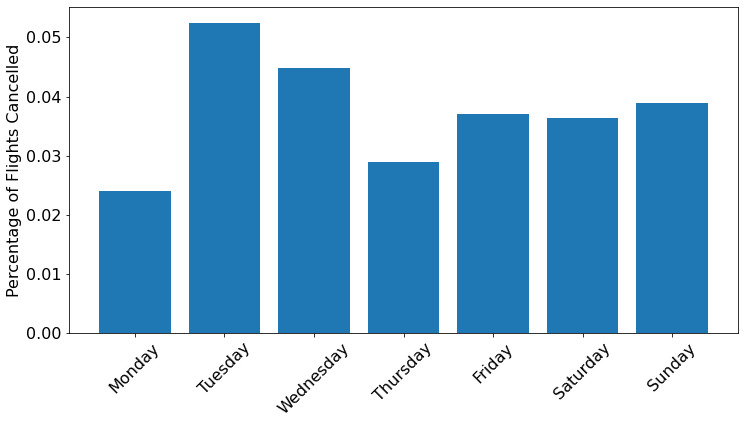

In [44]:
# Days of weeks

font = {'size'   : 16}
plt.rc('font', **font)

days_cancelled = cancelled['Cancelled'].groupby(data['DayOfWeek']).count()
days_total = data['Cancelled'].groupby(data['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

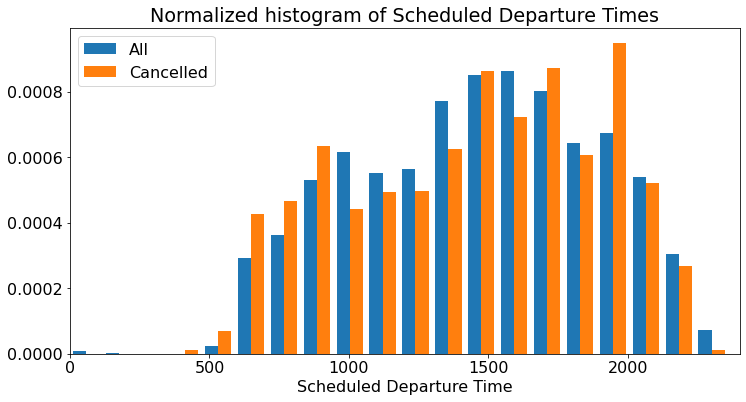

In [28]:
# Normilizings histograms to compare between the canvelled and 

#https://www.skytowner.com/explore/normalizing_a_histogram_in_matplotlib#

data['CRSDepTime'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['CRSDepTime'], cancelled['CRSDepTime']],density=True,stacked=False, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

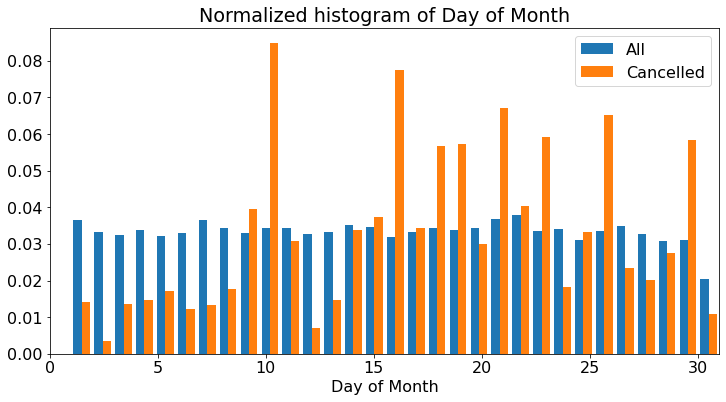

In [29]:
# com

data['DayofMonth'].head(10)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['DayofMonth'], cancelled['DayofMonth']], density=True, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

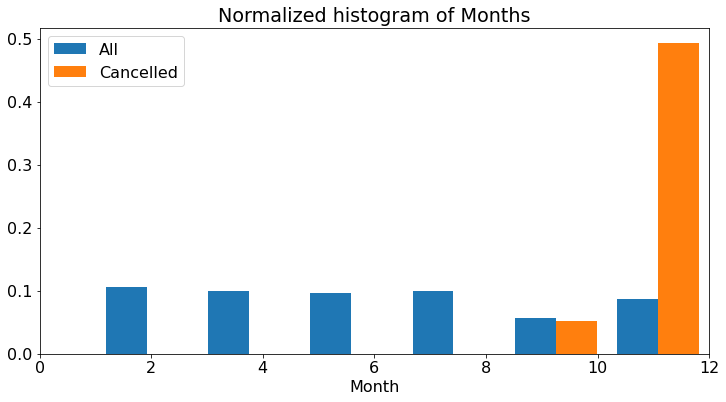

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['Month'], cancelled['Month']], density=True, bins=6, label=['All', 'Cancelled'])

ax.set_xlim(0,12)

ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')

plt.legend()
plt.show()

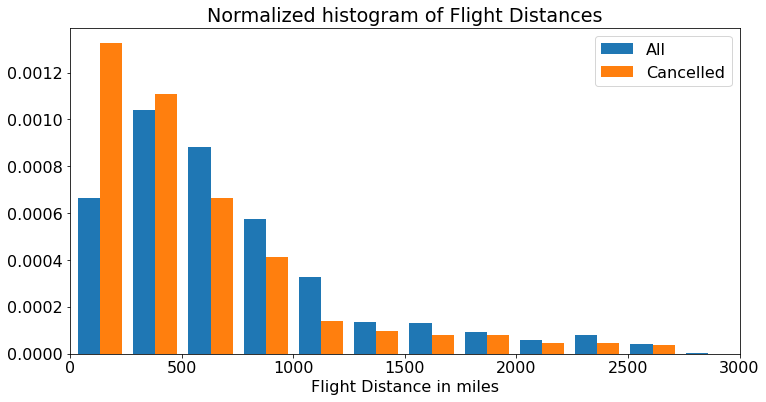

In [32]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([data['Distance'], cancelled['Distance']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

# Exercisi 3 

In [43]:

summary_table_carrier.to_excel('summary_table_carrier.xlsx',index = False,header = True)
    